# House Price Prediction - Multiple Linear Regression Model

# LINEAR REGRESSION MODEL

The objective of House price prediction in a Linear Regression model is to estimate or predict the price of a house based on a set of input features or independent variables.

The primary goal is to establish a relationship between the house price (dependent variable) and various factors(Independent variable) that may influence it, such as : Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address

# TYPES

(1) SIMPLE LINEAR REGRESSION MODEL - Linear Regression model that involves one Independent variable and one or more dependent variable.

   Equation - Y = MX + C (M=coefficient/slope & C=intercept)

(2) MULTIPLE LINEAR REGRESSION - Linear Regression model that involves more then one Independent variable and one dependent variable.

  Equation - Y = M1X1+M2X2+M3X3.....+MnXn (M=coefficient/slope & C=Intercept)

# Assumptions must be followed while building a Perfect Liner Regression Model 

.No Multicollinearity - The independent variable should not be highly                         correlated with each other.we can check through heat map.

.No AutoCorrelation - No Autocorrelation refers to the absence of correlation                  between the residuals(the differences between the actual and                  predicted values) of the model. No Autocorrelation Check                      through the Durbin watson test.

.Linearity - The Relationship between the independent & dependent variable                 must be linear.

.Normality of Residual - The Error must be normally distributed.

.Homoscedaticity - The error terms must have constant variance.

.No Endogeneity - There should be no relation between the errors & the                         independent variables.


# import the Libraries

In [175]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# Load the Dataset

In [176]:
dataset=pd.read_csv(r"G:\LearnBay Machine Learning\Linear  Regression(1)\USA_Housing.csv")
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


# Information about the dataset

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [178]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# DATA PREPROCESSING PART 

**Handling Missing Value**

In [179]:
dataset.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [180]:
dataset.isnull().sum()/len(dataset)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


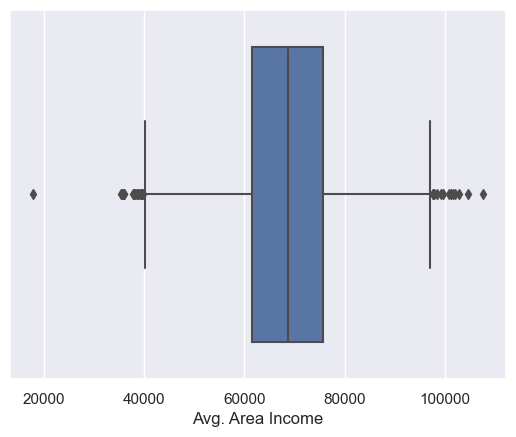

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


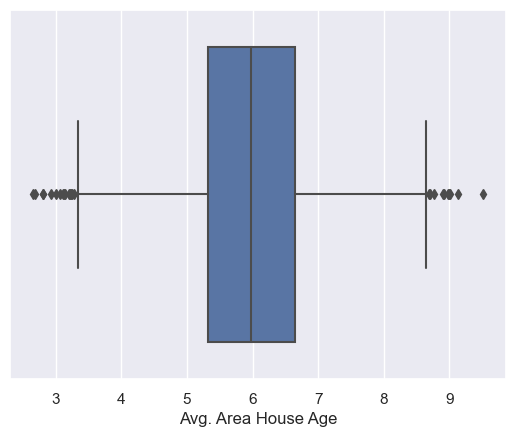

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


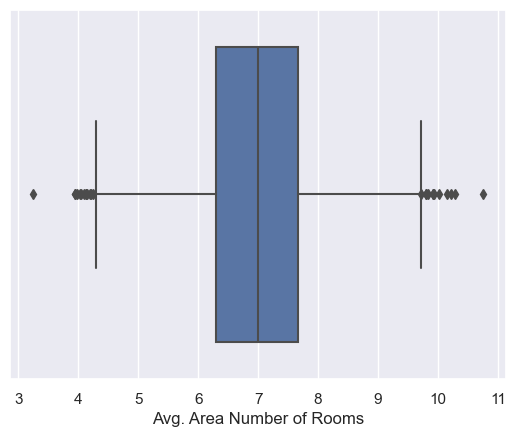

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


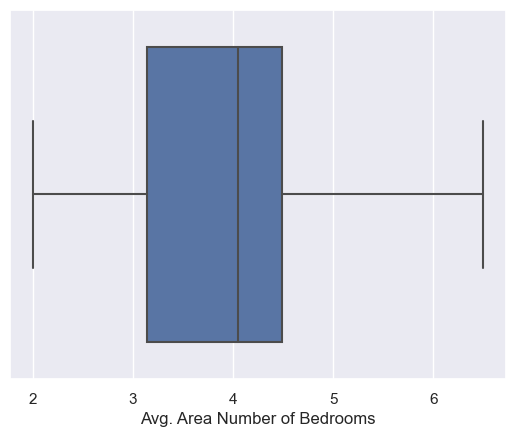

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


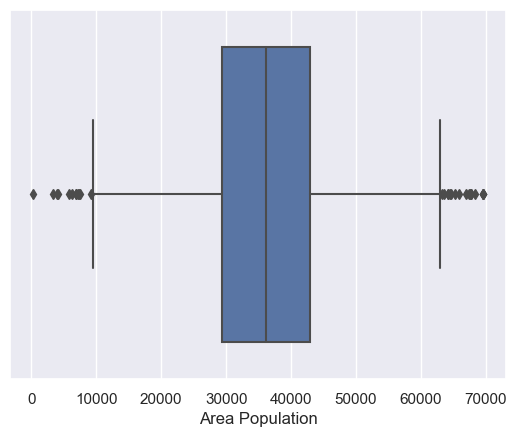

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


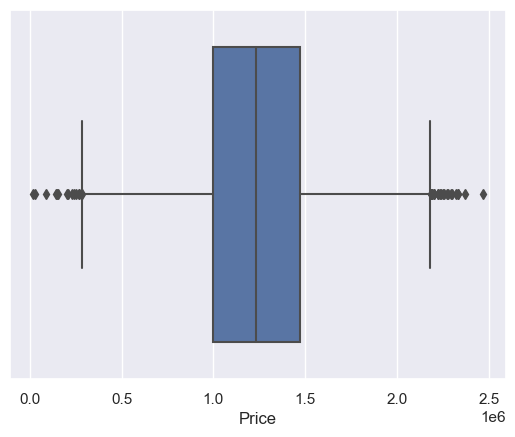

In [181]:
# check Outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for col in dataset.select_dtypes(exclude='object').columns[0:]:
    boxplots(col)


In [182]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [183]:
dataset['Avg. Area Income']=dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())

In [184]:
dataset['Avg. Area Number of Rooms']=dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].median())

In [185]:
dataset['Avg. Area Number of Bedrooms']=dataset['Avg. Area Number of Bedrooms'].fillna(dataset['Avg. Area Number of Bedrooms'].mean())

In [186]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

**Encoding method**

In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [188]:
dataset['Address'].nunique()

5000

In [189]:
# convert object to int
dataset['Address']=dataset['Address'].astype('category')
dataset['Address']=dataset['Address'].cat.codes


ANOVA, which stands for Analysis of Variance, is a statistical method used to compare the means of two or more groups to determine if there are any statistically significant differences among them. ANOVA is particularly useful when dealing with categorical independent variables and a continuous dependent variable.

In [190]:
# Whether Address is significant variable or not
# check p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols

model= ols('Price~Address',data=dataset).fit()
anova_result=sm.stats.anova_lm(model,typ=2)
print(anova_result)


                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


'Avg. Area Number of Bedrooms' is also not significant

In [191]:
dataset=dataset.drop(['Address','Avg. Area Number of Bedrooms'],axis=1)

In [192]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


**Outlier Treatment- Mandatory whenever we do linear regression model**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


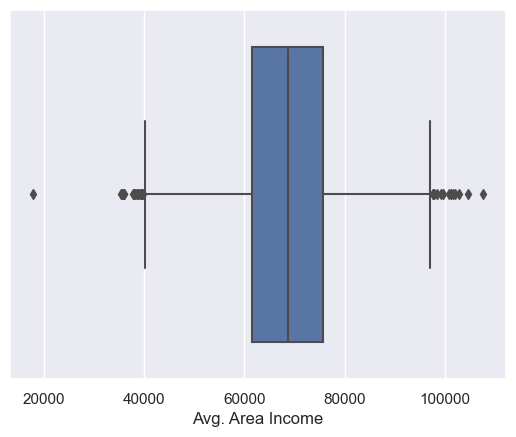

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


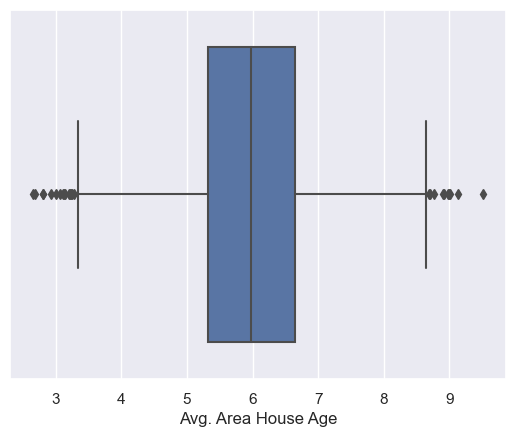

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


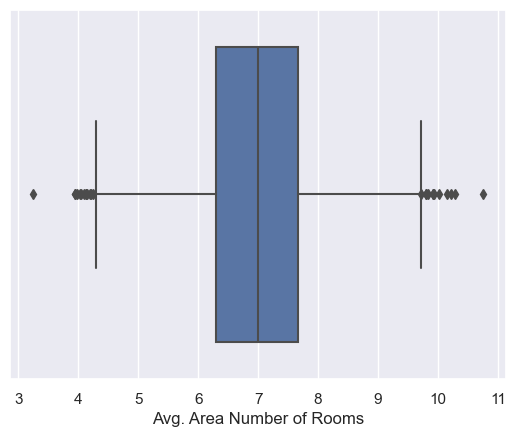

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


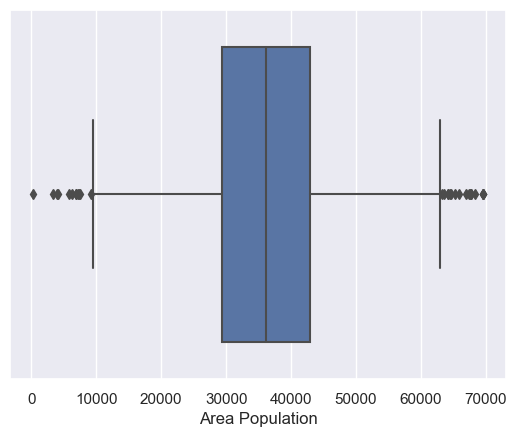

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


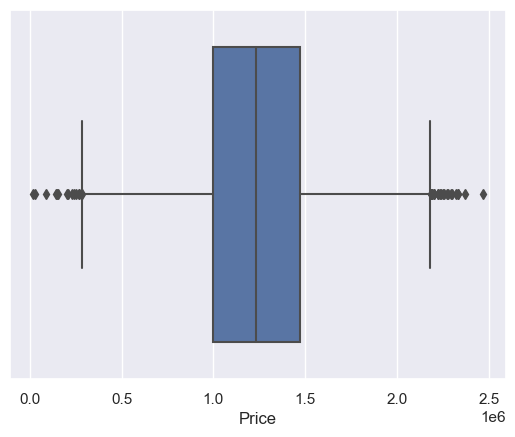

In [193]:

# check Outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for col in dataset.select_dtypes(exclude='object').columns[0:]:
    boxplots(col)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


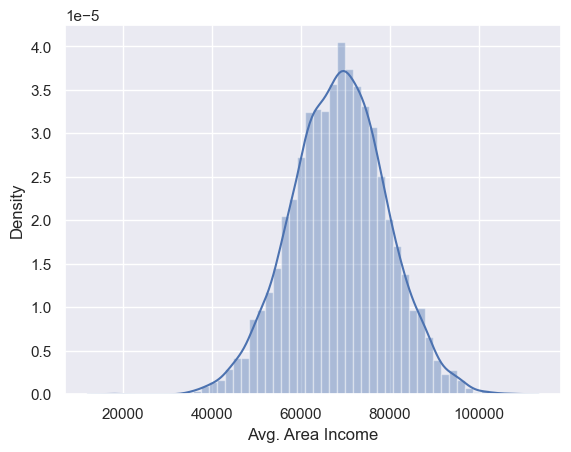

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


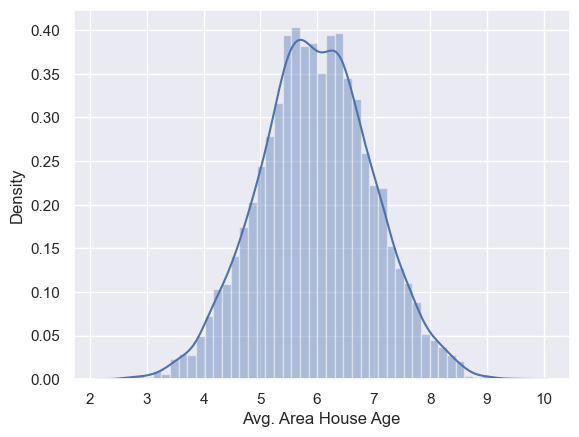

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


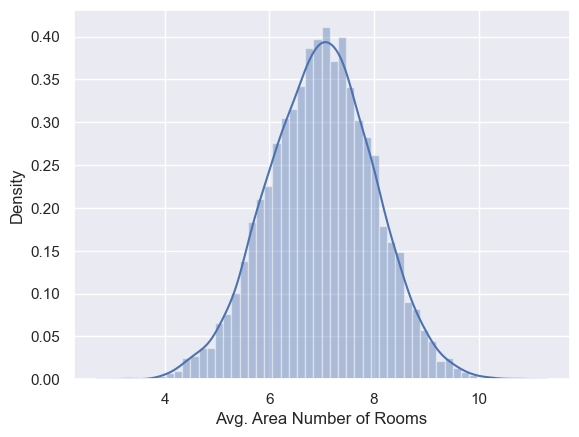

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


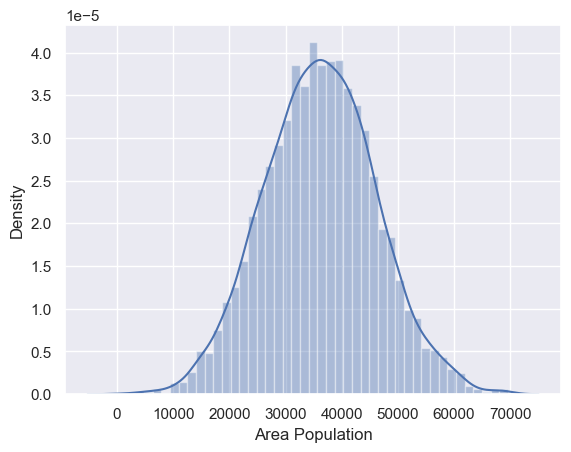

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


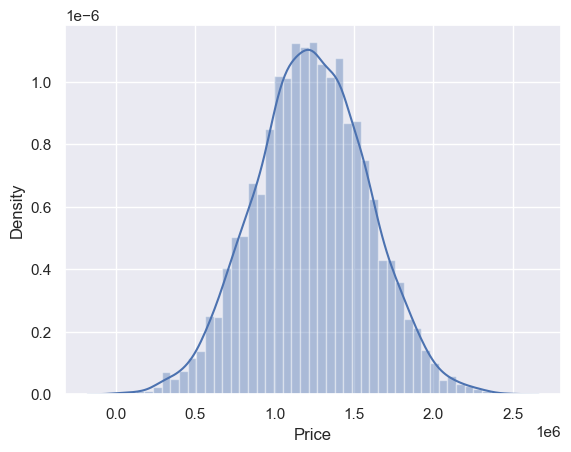

In [194]:
def distplots(col):
  sns.distplot(dataset[col])
  plt.show()

for i in list(dataset.columns)[0:]:
  distplots(i)

In [195]:
income_Q1=dataset['Avg. Area Income'].quantile(0.25)
income_Q3=dataset['Avg. Area Income'].quantile(0.75)
income_iqr=income_Q3 - income_Q1

upper_income=income_Q3 + 1.5*income_iqr
lower_income=income_Q1 - 1.5*income_iqr

dataset['Avg. Area Income']=np.where(dataset['Avg. Area Income'] > upper_income,upper_income,
                            np.where(dataset['Avg. Area Income'] < lower_income,lower_income,
                            dataset['Avg. Area Income']))

In [196]:
age_Q1=dataset['Avg. Area House Age'].quantile(0.25)
age_Q3=dataset['Avg. Area House Age'].quantile(0.75)
age_iqr=age_Q3 - age_Q1

upper_age = age_Q3 + 1.5*age_iqr
lower_age = age_Q1 - 1.5*age_iqr

dataset['Avg. Area House Age']=np.where(dataset['Avg. Area House Age'] > upper_age,upper_age,
                             np.where(dataset['Avg. Area House Age'] < lower_age,lower_age,
                            dataset['Avg. Area House Age']))

In [197]:
room_Q1=dataset['Avg. Area Number of Rooms'].quantile(0.25)
room_Q3=dataset['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr=room_Q3 - room_Q1

upper_room=room_Q3 + 1.5*room_iqr
lower_room=room_Q1 - 1.5*room_iqr

dataset['Avg. Area Number of Rooms'] = np.where(dataset['Avg. Area Number of Rooms'] > upper_room,upper_room,
                                        np.where(dataset['Avg. Area Number of Rooms'] < lower_room,lower_room,
                                        dataset['Avg. Area Number of Rooms']))

In [198]:
popl_Q1=dataset['Area Population'].quantile(0.25)
popl_Q3=dataset['Area Population'].quantile(0.75)
popl_iqr=popl_Q3 - popl_Q1

upper_popl=popl_Q3 + 1.5*popl_iqr
lower_popl=popl_Q1 - 1.5*popl_iqr

dataset['Area Population']=np.where(dataset['Area Population'] > upper_popl,upper_popl,
                                    np.where(dataset['Area Population'] < lower_popl,lower_popl,
                                             dataset['Area Population']))

**Feature Scaling**

In [199]:
# split the data into independent and dependent variable
x=dataset.drop(['Price'],axis=1)
y=dataset[['Price']]

In [200]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [201]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [202]:
# Feature scaling done only for independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [203]:
pd.DataFrame(x_scaler).head()

,0,1,2,3
0,1.036382,-0.298541,0.021620,-1.325622
1,1.008309,0.025747,-0.256381,0.407049
2,-0.690457,-0.113082,1.523179,0.073326
3,-0.495800,1.226822,-1.398967,-0.187484
4,-0.813869,-0.949376,0.850726,-0.994293


# Check Multicollinearity

Heatmap is the best way to check Multicollinearity

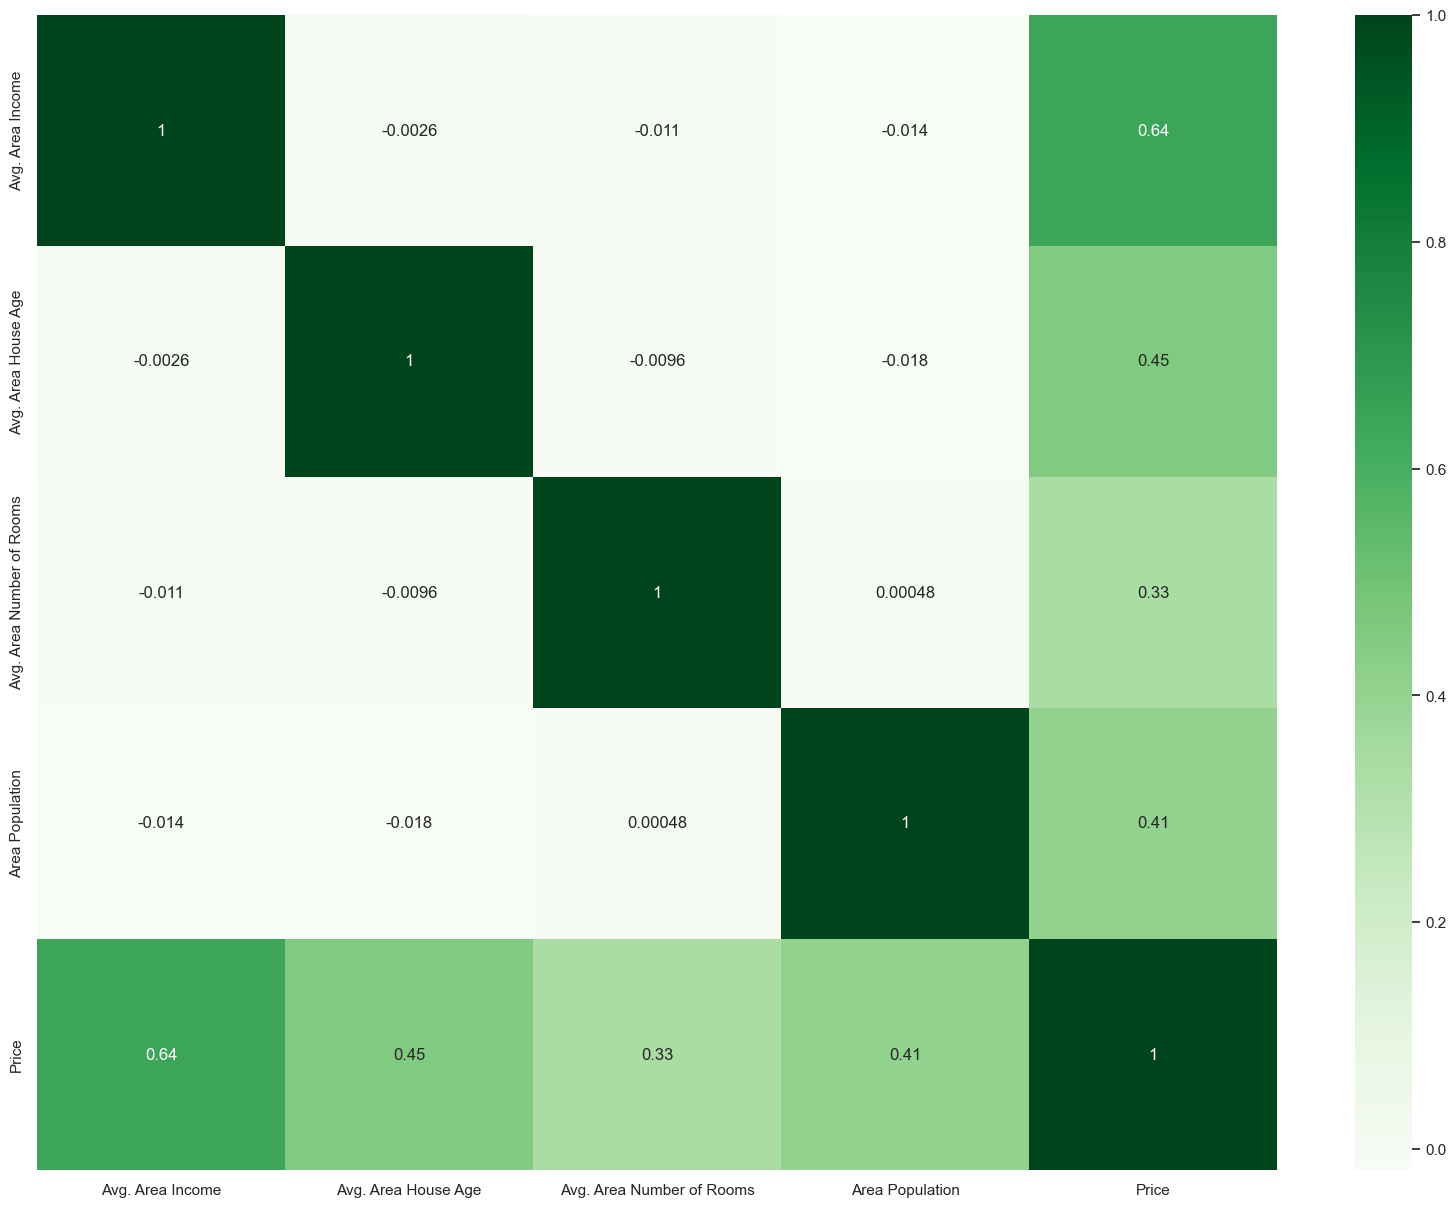

In [204]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap='Greens')
plt.show()

**Variance Inflation Factor(VIF)**


if VIF between 1 to 5 then there is no Multicollinearity

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaler
vif=pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i)
                                     for i in range(variable.shape[1])] # 0 means row 1 means column
vif['Features']=x.columns

In [206]:
vif

,Variance Inflation Factor,Features
0,1.000335,Avg. Area Income
1,1.000432,Avg. Area House Age
2,1.000214,Avg. Area Number of Rooms
3,1.000537,Area Population


#  Exploratory Data Analysis(EDA)

In [207]:
#!pip install pandas-profiling

In [208]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='EDA_for_Housing_dataset.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

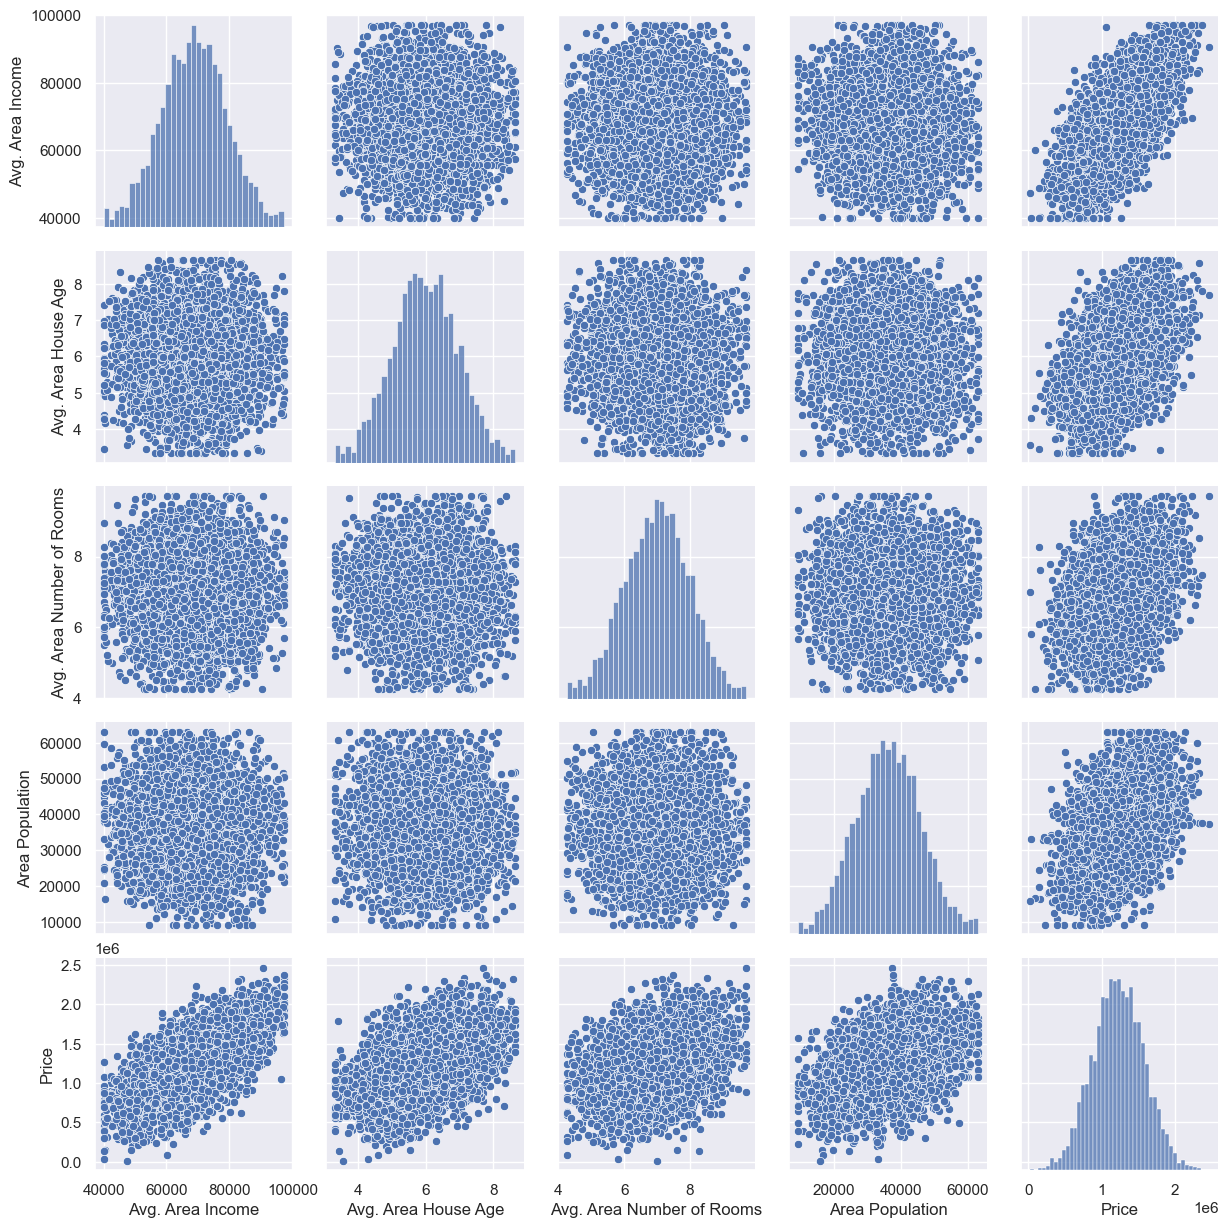

In [209]:
sns.pairplot(dataset)

# Split the data into train and test

In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Build OLS Model

In [211]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [212]:
regression_model=smf.OLS(endog=y_train,exog=x_train).fit()

In [213]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.331e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:54:04   Log-Likelihood:                         -48368.
No. Observations:                3500   AIC:                                  9.674e+04
Df Residuals:                    3496   BIC:                                  9.677e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.1182      0.325     31.096      0.000       9.480      10.756
Avg. Area House Age        5.019e+04   3622.518     13.856      0.000    4.31e+04    5.73e+04
Avg. Area Number of Rooms -7275.8991   3337.041     -2.180      0.029   -1.38e+04    -733.153
Area Population               8.4384      0.396     21.294      0.000       7.661       9.215
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.580
Skew:                          -0.005   Prob(JB):                        0.748
Kurtosis:                       2.938   Cond. No.                     7.92e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# No AutoCorrelation

Durbin-Watson -	1.997 (near to 2),so No Autocorrelation satisfied

# Building Linear Regression Model

In [214]:
# sklearn linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [215]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [216]:
# evaluate the model
from sklearn.metrics import r2_score

In [217]:
print("Training Accuracy ",r2_score(y_train,y_pred_train))
print("Test Accuracy ",r2_score(y_test,y_pred_test))

Training Accuracy  0.9158243573875635
Test Accuracy  0.9156233261491491


# Linearity

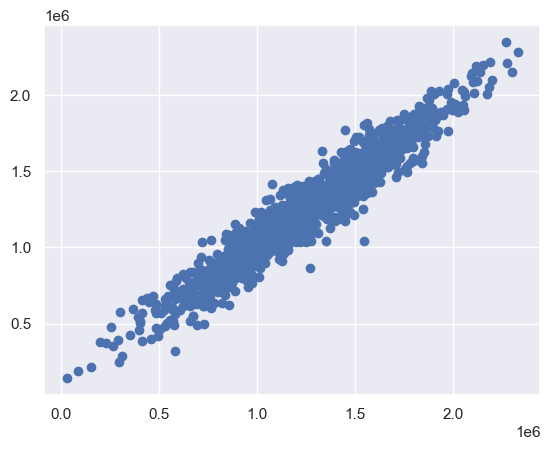

In [218]:
plt.scatter(y_test,y_pred_test)

# Normality of Residual

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


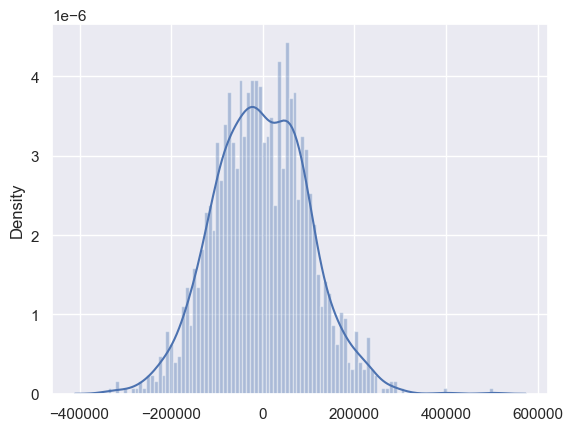

In [219]:
sns.distplot((y_test-y_pred_test),bins=100)
plt.show()

# Regularization

Regularization method to handle the underfitting and overfitting problem.

    Types of Regularization
    
   L1(Lasso Regression) - The co-efficient value is exactly zero(0) or close                        to zero(0),that approach is called Lasso Regression.
   
   L2(Ridge Regression) - The co-efficient value is Not Zero(0), close to                              zero(0),that approach is called Ridge Regression.
   
   L1+L2(Elastic Net Regressive) - It is a combination of Lasso & Ridge                                         Regression.

**Regularization : Lasso Model**

In [220]:
from sklearn.linear_model import Lasso

In [221]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [222]:
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [223]:
print("Training Accuracy Lasso ",r2_score(y_train,y_pred_train_lasso))
print("Test Accuracy Lasso ",r2_score(y_test,y_pred_test_lasso))


Training Accuracy Lasso  0.9158243573873972
Test Accuracy Lasso  0.9156233263933505


**Regularization : Ridge Model**

In [224]:
from sklearn.linear_model import Ridge

In [225]:
ridge=Lasso(alpha=0.3)
ridge.fit(x_train,y_train)

Lasso(alpha=0.3)

In [226]:
y_pred_train_rd=ridge.predict(x_train)
y_pred_test_rd=ridge.predict(x_test)

In [227]:
print("Training Accuracy Ridge ",r2_score(y_train,y_pred_train_rd))
print("Test Accuracy Ridge ",r2_score(y_test,y_pred_test_rd))

Training Accuracy Ridge  0.9158243573860672
Test Accuracy Ridge  0.9156233268807116


**Regularization : ElasticNet**

In [228]:
from sklearn.linear_model import ElasticNet

In [229]:
elastic =ElasticNet(alpha=0.1,l1_ratio=0.3)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [230]:
y_pred_train_el=elastic.predict(x_train)
y_pred_test_el=elastic.predict(x_test)

In [231]:
print("Training Accuracy ElasticNet ",r2_score(y_train,y_pred_train_el))
print("Test Accuracy ElasticNet ",r2_score(y_test,y_pred_test_el))

Training Accuracy ElasticNet  0.9143080006719568
Test Accuracy ElasticNet  0.9139943579949968


# Gradient Descent

whenever will do Gradient descent method,firstly we have to do Feature scaling

In [232]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [233]:
x_scaler

array([[ 1.03638167, -0.29854096,  0.02161971, -1.32562204],
       [ 1.00830945,  0.02574693, -0.25638091,  0.40704855],
       [-0.69045702, -0.11308223,  1.5231794 ,  0.07332638],
       ...,
       [-0.49150127,  1.29000432, -2.17958546, -0.29336339],
       [-0.05543662, -0.44898526,  0.14241618,  0.65575453],
       [-0.29100625,  0.01501175, -0.19494681,  1.04877464]])

In [234]:
pd.DataFrame(x_scaler).head()

,0,1,2,3
0,1.036382,-0.298541,0.021620,-1.325622
1,1.008309,0.025747,-0.256381,0.407049
2,-0.690457,-0.113082,1.523179,0.073326
3,-0.495800,1.226822,-1.398967,-0.187484
4,-0.813869,-0.949376,0.850726,-0.994293


In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=101)

In [236]:
from sklearn.linear_model import SGDRegressor

In [237]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [238]:
y_pred_train_sgd=sgd.predict(x_train)
y_pred_test_sgd=sgd.predict(x_test)

In [239]:
print("Gradient Descent Training Accuracy ",r2_score(y_train,y_pred_train_sgd))
print()
print("Gradient descent test accuracy",r2_score(y_test,y_pred_test_sgd))


Gradient Descent Training Accuracy  0.9157879204311381

Gradient descent test accuracy 0.9154966539912741


# Measurements

It is a measure of how good a model performs and how well it approximates the relationship

**Mean Absolute Error(MAE)**

Mean Absolute error measures the average absolute difference between the actual (observed) values and the predicted values.

In [240]:
print('MAE ',metrics.mean_absolute_error(y_test,y_pred_test))

MAE  82288.57794534975


**Mean Absolute Percentage Error(MAPE)**

In [241]:
print("MAPE ",metrics.mean_absolute_percentage_error(y_test,y_pred_test)*100)

MAPE  7.878282819409364


**Mean Squared Error(MSE)**

It is the average of the squared difference between the predicted and actual value

In [242]:
print("MSE ",metrics.mean_squared_error(y_test,y_pred_test))

MSE  10528848585.451927


**Root Mean Squared Error(RMSE)**

In [243]:
print("RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

RMSE  102610.17778686443


# Conclusion

R -square      >= 70%    satisfied

Adj-R-square   >=70%     satisfied

P-value(independent variable)   <=0.05    satisfied

Assumption : -
1) No Multicollinearity    - Satisfied

2) No AutoCorrelation      - Satisfied

3) Homoscedasticity        - Satisfied

4) normality of residual   - Satisfied

5) Linearity               - Satisfied

6) No endogenity           - Satisfied